# Analysis of World Series MVPs

There have been 63 World Series MVPs in Major League Baseball history.   In 1994, there was no World Series due to the 
baseball labor strike.  In the 1981 for the first time in history, there were three co-MVPs from perennially 
successful teams in the Dodgers and Yankees series.   Then in 2001 there were two co-MVPs, when we had a memorable 7-game 
series between the Diamondbacks and Yankees.   I grew up in the Bay Area as a Giants fan but have always been a baseball fan.
I currently live in the Chicago area and since living here I have now seen three curses broken by the 2004 Red Sox, 2005
White Sox and now the 2016 Cubs.  Since we are fresh from a  World Series, I have always wondered what makes players perform
in the post-season.   I don't know if I'll be able to answer that.  Because if I was able to do that, general managers across 
MLB would be knocking down my door for my data analysis skills.  Nevertheless, I am curious about World Series MVPs.

What are their characteristics?  
Did they play better in the postseason?  Or were they just great as they were all year?

In [2]:
## Read in the baseball data from the csv files

import unicodecsv
import pandas as pd

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

batting_df = pd.read_csv('batting.csv')
pitching_df = pd.read_csv('pitching.csv')

batting_post_df = pd.read_csv('battingpost.csv')
pitching_post_df = pd.read_csv('pitchingpost.csv')
master_df = pd.read_csv('master.csv')

awards_players_df = pd.read_csv('awardsplayers.csv')
allstarfull_df = pd.read_csv('allstarfull.csv')
fielding_post_df = pd.read_csv('fieldingpost.csv')


## Data Wrangling

I wanted to display certain characteristics of the World Series MVPs.  There was nothing too surprising here.   Most of the MVPs are right-handed like most of the population.  I was curious though because left-handed pitching is a luxury in baseball.  Most of the MVPs are from the USA but I suspect that will change in the future because baseball has become an international sport and many stars come from Latin America now.

In [3]:
# Merging the Awards players data with the master data set
awards_master_df = awards_players_df.merge(master_df, on=['playerID'], how='inner')

# Extracting the World Series MVPs
world_series_mvps_df = awards_master_df[awards_master_df['awardID'] == 'World Series MVP']

print str(len(world_series_mvps_df)) + ' World Series MVPs in history'

63 World Series MVPs in history


In [4]:
# List of the World Series MVPs

world_series_mvps_df[['yearID','playerID','nameGiven','nameLast']].sort_values(['yearID'])

,yearID,playerID,nameGiven,nameLast
2155,1955,podrejo01,John Joseph,Podres
2213,1956,larsedo01,Don James,Larsen
2279,1957,burdele01,Selva Lewis,Burdette
2312,1958,turlebo01,Robert Lee,Turley
2364,1959,sherrla01,Lawrence,Sherry
2463,1960,richabo01,Robert Clinton,Richardson
2199,1961,fordwh01,Edward Charles,Ford
2531,1962,terryra01,Ralph Willard,Terry
2577,1963,koufasa01,Sanford,Koufax
2654,1964,gibsobo01,Robert,Gibson


In [5]:
# Reporting on the players batting side
ws_mvp_bats_df = world_series_mvps_df.groupby('bats')

print ws_mvp_bats_df['playerID'].count()

print ''
print '49 of the 63 World series MVPs bat from the right side'

bats
B     2
L    12
R    49
Name: playerID, dtype: int64

49 of the 63 World series MVPs bat from the right side


In [6]:
# Reporting on the players throwing side
ws_mvp_throws_df = world_series_mvps_df.groupby('throws')

print ws_mvp_throws_df['playerID'].count()

print ''
print '49 of the 63 World series MVPs throw from the right side'

throws
L    14
R    49
Name: playerID, dtype: int64

49 of the 63 World series MVPs throw from the right side


In [7]:
# Reporting on the players birth country
ws_mvp_country_df = world_series_mvps_df.groupby('birthCountry')

print ws_mvp_country_df['playerID'].count()

print ''
print '51 of the 63 World series MVPs are from the USA'

birthCountry
Colombia      1
Cuba          1
D.R.          4
Japan         1
P.R.          2
Panama        1
USA          51
Venezuela     2
Name: playerID, dtype: int64

51 of the 63 World series MVPs are from the USA


In [8]:
# Reporting on the players positions

# Stardarizing the players position data 
def convert_position(position):
    if position == 'P':
        return 'Pitcher'
    elif position == 'DH':
        return 'DH'
    else:
        return 'Fielder'

def convert_positions(positions):
    return positions.applymap(convert_position)

# Merging the merged world series data with the fielding postseason data
ws_positions_df = world_series_mvps_df.merge(fielding_post_df.drop_duplicates(['playerID','yearID']), on=['playerID','yearID'], how='left')

ws_pos_df = ws_positions_df.groupby(['yearID','playerID']).max()

ws_convert_pos_df = convert_positions(ws_pos_df)

print ws_convert_pos_df.groupby('POS').count()['awardID']

print ''
print '28 of the 63 World series MVPs are pitchers'

POS
DH          1
Fielder    34
Pitcher    28
Name: awardID, dtype: int64

28 of the 63 World series MVPs are pitchers


In [9]:
# Reporting if the player was an allstar the year he was a world series mvp

# Standardizing the all star data 
def allstar_convert(allstar):
    if allstar >= 0:
        return 'All-Star'
    else:
        return 'Not All-Star'

def allstar_converts(allstars):
    return allstars.applymap(allstar_convert)
    
# Merging the merged world series data with the allstar data
ws_allstar_df = world_series_mvps_df.merge(allstarfull_df, on=['playerID', 'yearID'], how='left')

ws_allstars_df = ws_allstar_df.groupby(['yearID','playerID']).max()

ws_convert_allstar_df = allstar_converts(ws_allstars_df)

print ws_convert_allstar_df.groupby('gameNum').count()['awardID']

print ''
print '35 of the 63 World series MVPs were selected to the All-Star team the same year'

gameNum
All-Star        35
Not All-Star    28
Name: awardID, dtype: int64

35 of the 63 World series MVPs were selected to the All-Star team the same year


## Data Exploration

Here I am computing statistics for MVP pitchers as well as the MVP hitters.

Important statistics for a pitcher are ERA (Earned Run Average), WHIP (Walks & Hits per Innings Pitched), BB (Walks) & SO (Strikeouts).  Since BB & SO are totals, it's difficult to compare postseason & regular season unless you compute an average.  Most baseball analysts usually discuss ERA & WHIP on sports radio or television.

Important statistics for a hitter are b_avg (Batting Average), OBP (On-base percentage), RBI (Runs batted in) & extra_hits (extra base hits - doubles, triples or Home runs).  Again since RBI & extra_hits are totals, it's difficult to compare postseason & regular season unless you compute an average.  As a note, baseball analysts do discuss all four of these batting statistics.

In [10]:
# Postseason pitchers analysis
# world_series_mvps_df
# pitchingpost_df
# pitching_df

# Merging the merged world series data with the pitchingpost (postseason) data
ws_pitching_df = world_series_mvps_df.merge(pitching_post_df, on=['playerID', 'yearID'], how='inner')

ws_pitching_era_df = ws_pitching_df.groupby(['yearID','playerID','nameGiven','nameLast']).sum()

# Computing postseason ERA & WHIP to 2 decimals
# PostERA - earned run average in the postseason
# PostWHIP - walks & hits per innings pitched in the postseason

ws_pitching_era_df['PostERA'] = 0
ws_pitching_era_df['PostERA'] = ws_pitching_era_df['ER'] / ws_pitching_era_df['IPouts'] * 27
ws_pitching_era_df['PostWHIP'] = 0
ws_pitching_era_df['PostWHIP'] = (ws_pitching_era_df['H'] + ws_pitching_era_df['BB'])/ ws_pitching_era_df['IPouts'] * 3

ws_pitching_era2_df = ws_pitching_era_df.round(2)

## Postseason - ERA, WHIP, Walks, Strikeouts
ws_pitching_era2_df[['PostERA','PostWHIP', 'BB','SO']]



,,,,PostERA,PostWHIP,BB,SO
yearID,playerID,nameGiven,nameLast,,,,
1955,podrejo01,John Joseph,Podres,1.00,1.06,4,10
1956,larsedo01,Don James,Larsen,0.00,0.47,4,7
1957,burdele01,Selva Lewis,Burdette,0.67,0.93,4,13
1958,turlebo01,Robert Lee,Turley,2.76,1.04,7,13
1959,sherrla01,Lawrence,Sherry,0.71,0.79,2,5
1961,fordwh01,Edward Charles,Ford,0.00,0.50,1,7
1962,terryra01,Ralph Willard,Terry,1.80,0.76,2,16
1963,koufasa01,Sanford,Koufax,1.50,0.83,3,23
1964,gibsobo01,Robert,Gibson,3.00,1.15,8,31


In [11]:
# Regular season pitchers analysis
# Merging the merged world series data with the pitching (regular season) data
# RegWHIP - walks & hits per innings pitched in the regular season

ws_reg_pitching_df = world_series_mvps_df.merge(pitching_df, on=['playerID', 'yearID'], how='inner')
ws_reg_pitching_df['RegWHIP'] = 0
ws_reg_pitching_df['RegWHIP'] = (ws_reg_pitching_df['H'] + ws_reg_pitching_df['BB'])/ ws_reg_pitching_df['IPouts'] * 3

ws_reg_pitching2_df = ws_reg_pitching_df.round(2)

## Regular season - ERA, WHIP, Walks, Strikeouts
ws_reg_pitching2_df[['yearID','playerID','nameGiven','nameLast','ERA','RegWHIP','BB','SO']].sort_values(['yearID'])

,yearID,playerID,nameGiven,nameLast,ERA,RegWHIP,BB,SO
0,1955,podrejo01,John Joseph,Podres,3.95,1.36,57,114
2,1956,larsedo01,Don James,Larsen,3.26,1.27,96,107
3,1957,burdele01,Selva Lewis,Burdette,3.72,1.24,59,78
4,1958,turlebo01,Robert Lee,Turley,2.97,1.25,128,168
5,1959,sherrla01,Lawrence,Sherry,2.19,1.25,43,72
1,1961,fordwh01,Edward Charles,Ford,3.21,1.18,92,209
6,1962,terryra01,Ralph Willard,Terry,3.19,1.05,57,176
7,1963,koufasa01,Sanford,Koufax,1.88,0.87,58,306
9,1964,gibsobo01,Robert,Gibson,3.01,1.17,86,245
8,1965,koufasa01,Sanford,Koufax,2.04,0.86,71,382


In [12]:
# Postseason batters analysis
# world_series_mvps_df
# battingpost_df
# batting_df

# Merging the merged world series (positions) data with the battingpost (postseason) data
# Fill missing data with 0
ws_batting_df = ws_positions_df.merge(batting_post_df, on=['playerID', 'yearID'], how='inner')
ws_no_pitchers_df = ws_batting_df[ws_batting_df['POS'] != 'P'].fillna(0)
ws_batting_avg_df = ws_no_pitchers_df.groupby(['yearID','playerID','nameGiven','nameLast']).sum()

# Computing avg, rbi, extra basehits
# b_avg = batting average
# extra_hits = doubles, triples + home runs
# OBP = on base percentage

def compute_bstats(get_stats):
    get_stats['b_avg'] = 0
    get_stats['extra_hits'] = get_stats['2B'] + get_stats['3B'] + get_stats['HR']    
    get_stats['OBP'] = (get_stats['H'] + get_stats['BB'] + get_stats['HBP']) / (get_stats['AB'] + get_stats['BB'] + get_stats['HBP'] + get_stats['SF']) 
    if get_stats['AB'] == 0:
        get_stats['b_avg'] = 0
    else:
        get_stats['b_avg'] = get_stats['H'] / get_stats['AB']
    return get_stats
    
ws_batting_avg3_df = ws_batting_avg_df.apply(compute_bstats, axis=1)
ws_batting_avg3_df[['b_avg','OBP', 'RBI', 'extra_hits']].round(3)



,,,,b_avg,OBP,RBI,extra_hits
yearID,playerID,nameGiven,nameLast,,,,
1960,richabo01,Robert Clinton,Richardson,0.367,0.387,12.0,5.0
1966,robinfr02,Frank,Robinson,0.286,0.375,3.0,3.0
1969,clenddo01,Donn Alvin,Clendenon,0.357,0.438,4.0,4.0
1970,robinbr01,Brooks Calbert,Robinson,0.485,0.471,8.0,6.0
1971,clemero01,Roberto,Clemente,0.383,0.420,8.0,5.0
1972,tenacge01,Fury Gene,Tenace,0.225,0.311,10.0,5.0
1973,jacksre01,Reginald Martinez,Jackson,0.240,0.269,6.0,5.0
1975,rosepe01,Peter Edward,Rose,0.366,0.447,4.0,3.0
1976,benchjo01,Johnny Lee,Bench,0.444,0.464,7.0,6.0


In [13]:
# Regular season batters analysis

# Merging the merged world series data with the pitching (regular season) data
#ws_reg_batting_df = world_series_mvps_df.merge(batting_df, on=['playerID', 'yearID'], how='inner')
ws_reg_batting_df = ws_positions_df.merge(batting_df, on=['playerID', 'yearID'], how='inner')
ws_reg_no_pitchers_df = ws_reg_batting_df[ws_reg_batting_df['POS'] != 'P']
ws_reg_batting_avg_df = ws_reg_no_pitchers_df.groupby(['yearID','playerID','nameGiven','nameLast']).sum()

ws_reg_batting_avg3_df = ws_reg_batting_avg_df.apply(compute_bstats, axis=1)
ws_reg_batting_avg3_df[['b_avg', 'OBP', 'RBI', 'extra_hits']].round(3)

,,,,b_avg,OBP,RBI,extra_hits
yearID,playerID,nameGiven,nameLast,,,,
1960,richabo01,Robert Clinton,Richardson,0.252,0.303,26.0,16.0
1966,robinfr02,Frank,Robinson,0.316,0.410,122.0,85.0
1969,clenddo01,Donn Alvin,Clendenon,0.248,0.303,51.0,28.0
1970,robinbr01,Brooks Calbert,Robinson,0.276,0.335,94.0,53.0
1971,clemero01,Roberto,Clemente,0.341,0.370,86.0,50.0
1972,tenacge01,Fury Gene,Tenace,0.225,0.307,32.0,13.0
1973,jacksre01,Reginald Martinez,Jackson,0.293,0.383,117.0,62.0
1975,rosepe01,Peter Edward,Rose,0.317,0.406,74.0,58.0
1976,benchjo01,Johnny Lee,Bench,0.234,0.348,74.0,41.0


## Data Charts

Notice in terms of pitching, the distribution of ERA (Earned Run Average) & WHIP (Walks & Hits per Innings Pitched) appears to be lower in the postseason vs the regular season.

Then in terms of batting, the distribution of batting average and on-base percentage appears to be higher in the postseason vs the regular season.

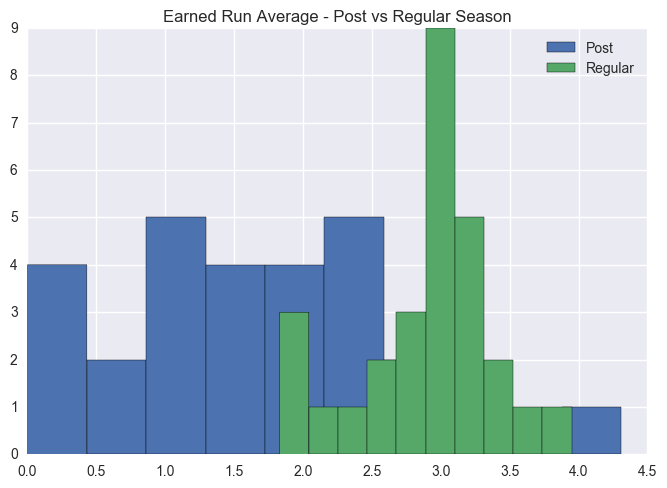

In [14]:
## Pitching Visuals
## Earned Run Average

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ws_pitching_era2_df['PostERA'].hist()

ws_reg_pitching_df['ERA'].hist()

plt.title("Earned Run Average - Post vs Regular Season")
plt.legend(['Post', 'Regular'])

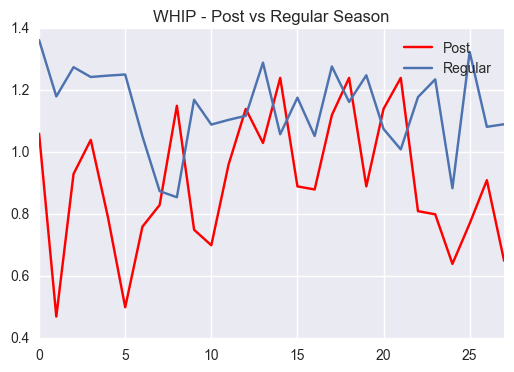

In [15]:
## Pitching Visuals
## WHIP - Walks & Hits per Innings Pitched

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ws_pitching_era2_df['PostWHIP'].plot.line(use_index=False, color='r')

ws_reg_pitching_df['RegWHIP'].plot.line(use_index=False)

plt.title("WHIP - Post vs Regular Season")
plt.legend(['Post', 'Regular'])

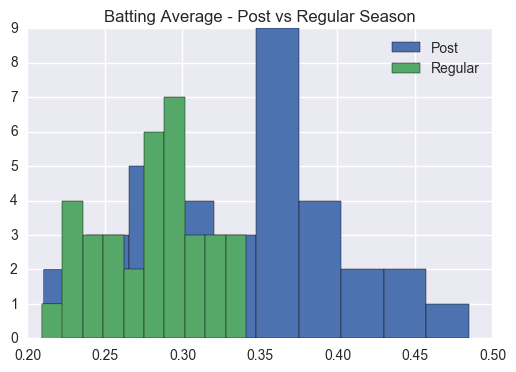

In [16]:
## Batting Visuals
## Batting Average

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ws_batting_avg3_df['b_avg'].hist()

ws_reg_batting_avg3_df['b_avg'].hist()

plt.title("Batting Average - Post vs Regular Season")
plt.legend(['Post', 'Regular'])


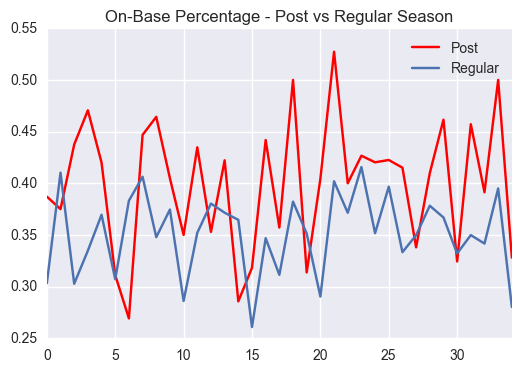

In [17]:
## Batting Visuals
## On-Base Percentage

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ws_batting_avg3_df['OBP'].plot.line(use_index=False, color='r')

ws_reg_batting_avg3_df['OBP'].plot.line(use_index=False)

plt.title("On-Base Percentage - Post vs Regular Season")
plt.legend(['Post', 'Regular'])

## Postseason vs. Regular season statistics

In [18]:
## Pitching Statistics - Postseason

ws_pitching_era2_df[['PostERA', 'PostWHIP', 'BB', 'SO']].describe().round(2)


,PostERA,PostWHIP,BB,SO
count,28.00,28.00,28.00,28.00
mean,1.62,0.90,6.21,23.25
std,1.02,0.22,3.48,13.32
min,0.00,0.47,1.00,5.00
25%,1.00,0.77,3.75,13.00
50%,1.64,0.89,6.00,22.50
75%,2.20,1.08,8.25,29.25
max,4.31,1.24,13.00,56.00


In [19]:
## Pitching Statistics - Regular season

ws_reg_pitching2_df[['ERA', 'RegWHIP', 'BB', 'SO']].describe().round(2)

,ERA,RegWHIP,BB,SO
count,28.00,28.00,28.00,28.00
mean,2.90,1.14,60.79,173.25
std,0.51,0.13,24.54,85.81
min,1.83,0.86,18.00,52.00
25%,2.69,1.08,42.25,112.25
50%,2.98,1.16,58.50,160.50
75%,3.19,1.25,71.50,200.00
max,3.95,1.36,128.00,382.00


In [20]:
## Batting Statistics - Postseason

ws_batting_avg3_df[['b_avg','OBP', 'RBI', 'extra_hits']].describe().round(3)

,b_avg,OBP,RBI,extra_hits
count,35.000,35.000,35.000,35.000
mean,0.338,0.400,9.086,5.829
std,0.064,0.063,4.047,2.905
min,0.211,0.269,2.000,1.000
25%,0.287,0.351,6.000,4.000
50%,0.349,0.410,9.000,5.000
75%,0.374,0.440,12.500,7.000
max,0.485,0.527,21.000,14.000


In [21]:
## Batting Statistics - Regular season

ws_reg_batting_avg3_df[['b_avg','OBP', 'RBI', 'extra_hits']].describe().round(3)

,b_avg,OBP,RBI,extra_hits
count,35.000,35.000,35.000,35.000
mean,0.281,0.351,73.343,45.200
std,0.034,0.040,33.548,21.189
min,0.209,0.261,7.000,5.000
25%,0.251,0.333,49.000,29.000
50%,0.286,0.352,74.000,50.000
75%,0.304,0.379,100.500,59.000
max,0.341,0.416,130.000,87.000


<html>

<head>
<meta http-equiv=Content-Type content="text/html; charset=windows-1252">
<meta name=Generator content="Microsoft Word 14 (filtered)">
<style>
<!--
 /* Font Definitions */
 @font-face
	{font-family:Calibri;
	panose-1:2 15 5 2 2 2 4 3 2 4;}
@font-face
	{font-family:Tahoma;
	panose-1:2 11 6 4 3 5 4 4 2 4;}
 /* Style Definitions */
 p.MsoNormal, li.MsoNormal, div.MsoNormal
	{margin-top:0in;
	margin-right:0in;
	margin-bottom:10.0pt;
	margin-left:0in;
	line-height:115%;
	font-size:11.0pt;
	font-family:"Calibri","sans-serif";}
a:link, span.MsoHyperlink
	{color:blue;
	text-decoration:underline;}
a:visited, span.MsoHyperlinkFollowed
	{color:purple;
	text-decoration:underline;}
p.MsoAcetate, li.MsoAcetate, div.MsoAcetate
	{mso-style-link:"Balloon Text Char";
	margin:0in;
	margin-bottom:.0001pt;
	font-size:8.0pt;
	font-family:"Tahoma","sans-serif";}
p.MsoListParagraph, li.MsoListParagraph, div.MsoListParagraph
	{margin-top:0in;
	margin-right:0in;
	margin-bottom:10.0pt;
	margin-left:.5in;
	line-height:115%;
	font-size:11.0pt;
	font-family:"Calibri","sans-serif";}
p.MsoListParagraphCxSpFirst, li.MsoListParagraphCxSpFirst, div.MsoListParagraphCxSpFirst
	{margin-top:0in;
	margin-right:0in;
	margin-bottom:0in;
	margin-left:.5in;
	margin-bottom:.0001pt;
	line-height:115%;
	font-size:11.0pt;
	font-family:"Calibri","sans-serif";}
p.MsoListParagraphCxSpMiddle, li.MsoListParagraphCxSpMiddle, div.MsoListParagraphCxSpMiddle
	{margin-top:0in;
	margin-right:0in;
	margin-bottom:0in;
	margin-left:.5in;
	margin-bottom:.0001pt;
	line-height:115%;
	font-size:11.0pt;
	font-family:"Calibri","sans-serif";}
p.MsoListParagraphCxSpLast, li.MsoListParagraphCxSpLast, div.MsoListParagraphCxSpLast
	{margin-top:0in;
	margin-right:0in;
	margin-bottom:10.0pt;
	margin-left:.5in;
	line-height:115%;
	font-size:11.0pt;
	font-family:"Calibri","sans-serif";}
p.c2, li.c2, div.c2
	{mso-style-name:c2;
	margin-right:0in;
	margin-left:0in;
	font-size:12.0pt;
	font-family:"Times New Roman","serif";}
span.c0
	{mso-style-name:c0;}
span.BalloonTextChar
	{mso-style-name:"Balloon Text Char";
	mso-style-link:"Balloon Text";
	font-family:"Tahoma","sans-serif";}
.MsoChpDefault
	{font-family:"Calibri","sans-serif";}
.MsoPapDefault
	{margin-bottom:10.0pt;
	line-height:115%;}
@page WordSection1
	{size:8.5in 11.0in;
	margin:1.0in 1.0in 1.0in 1.0in;}
div.WordSection1
	{page:WordSection1;}
 /* List Definitions */
 ol
	{margin-bottom:0in;}
ul
	{margin-bottom:0in;}
-->
</style>

</head>

<body lang=ES-BO link=blue vlink=purple>

<div class=WordSection1>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><b><span lang=EN-US style='font-size:14.0pt;color:black'>Statistical
Analysis of the Postseason ERA vs Regular Season ERA</span></b></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>Null Hypothesis:  </span><span
lang=EN-US style='font-size:14.0pt;color:black'>H<sub>o</sub>:  </span><strong><span
lang=EN-US style='font-size:14.0pt;font-family:"Calibri","sans-serif";
color:#252525;background:white'>&#956;</span></strong><sub><span lang=EN-US
style='font-size:14.0pt;color:black'>1</span></sub><span lang=EN-US
style='font-size:14.0pt;color:black'> = </span><strong><span lang=EN-US
style='font-size:14.0pt;font-family:"Calibri","sans-serif";color:#252525;
background:white'>&#956;</span></strong><sub><span lang=EN-US style='font-size:
14.0pt;color:black'> 2</span></sub></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='font-size:14.0pt;color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>There is no difference in the mean
ERA (Earned Run Average) from the postseason and the regular season.</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>Alt Hypothesis:  </span><span
lang=EN-US style='font-size:14.0pt;color:black'>H<sub>a</sub>: </span><strong><span
lang=EN-US style='font-size:14.0pt;font-family:"Calibri","sans-serif";
color:#252525;background:white'>&#956;</span></strong><sub><span lang=EN-US
style='font-size:14.0pt;color:black'> 1</span></sub><span lang=EN-US
style='font-size:14.0pt;color:black'> != </span><strong><span lang=EN-US
style='font-size:14.0pt;font-family:"Calibri","sans-serif";color:#252525;
background:white'>&#956;</span></strong><sub><span lang=EN-US style='font-size:
14.0pt;color:black'> 2</span></sub></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>There is significant difference in
the mean ERA in the postseason and the regular season.</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><strong><span lang=EN-US style='font-size:14.0pt;font-family:"Calibri","sans-serif";
color:#252525;background:white'>&#956;</span></strong><sub><span lang=EN-US
style='font-size:14.0pt;color:black'>1</span></sub><span lang=EN-US
style='font-size:14.0pt;color:black'> </span><span lang=EN-US style='color:
black'>represents the mean ERA in the postseason.</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><strong><span lang=EN-US style='font-size:14.0pt;font-family:"Calibri","sans-serif";
color:#252525;background:white'>&#956;</span></strong><sub><span lang=EN-US
style='font-size:14.0pt;color:black'> 2 </span></sub><span lang=EN-US
style='color:black'> represents the mean ERA during the regular season.</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>Since I am working with 2 small samples,
I am performing a dependent two-tailed t-test for this research.   We assume
the population data to be approximately normally distributed.</span></p>

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none'>
 <tr>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>Post ERA</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>Regular ERA</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>Mean</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>1.62</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>2.90</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>Standard deviation</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>1.02</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>0.51</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>n</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>28</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>28</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>Using alpha = 0.05</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>df = degrees of freedom</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>27</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>t-critical</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>2.05</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>t statistic</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>-6.47</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>r^2</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>.65</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>95% confidence interval</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>(-1.70,-0.88)</span></span></p>
  </td>
 </tr>
</table>

<p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'>&nbsp;</span></span></p>

<p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'>I calculated a t statistic of -6.47 which falls in the alpha =
0.05 critical range of +-2.05 so therefore, we reject the null hypothesis that
the means of the ERA (Earned Run Average) are equal from the postseason and
regular season.   The means of the postseason ERA and regular season ERA are statistically
significant.   Sixty-five (65) percent of the variability in the Earned Run
Average is due to the postseason vs the regular season.  The 95% CI of (-1.70,-0.88)
shows we are 95% confident that the difference in the means falls in this
range.   In other words, the postseason ERA is lower than the regular season
ERA.</span></span></p>

<p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'> <br>
<br>
</span></span></p>

<p class=MsoNormal><b><span lang=EN-US style='font-size:14.0pt;line-height:
115%;color:black'>Statistical Analysis of the Postseason Batting Average vs
Regular Season Batting Average</span></b></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>Null Hypothesis:  </span><span
lang=EN-US style='font-size:14.0pt;color:black'>H<sub>o</sub>:  </span><strong><span
lang=EN-US style='font-size:14.0pt;font-family:"Calibri","sans-serif";
color:#252525;background:white'>&#956;</span></strong><sub><span lang=EN-US
style='font-size:14.0pt;color:black'>1</span></sub><span lang=EN-US
style='font-size:14.0pt;color:black'> = </span><strong><span lang=EN-US
style='font-size:14.0pt;font-family:"Calibri","sans-serif";color:#252525;
background:white'>&#956;</span></strong><sub><span lang=EN-US style='font-size:
14.0pt;color:black'> 2</span></sub></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='font-size:14.0pt;color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>There is no difference in the mean
batting average from the postseason and the regular season.</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>Alt Hypothesis:  </span><span
lang=EN-US style='font-size:14.0pt;color:black'>H<sub>a</sub>: </span><strong><span
lang=EN-US style='font-size:14.0pt;font-family:"Calibri","sans-serif";
color:#252525;background:white'>&#956;</span></strong><sub><span lang=EN-US
style='font-size:14.0pt;color:black'> 1</span></sub><span lang=EN-US
style='font-size:14.0pt;color:black'> != </span><strong><span lang=EN-US
style='font-size:14.0pt;font-family:"Calibri","sans-serif";color:#252525;
background:white'>&#956;</span></strong><sub><span lang=EN-US style='font-size:
14.0pt;color:black'> 2</span></sub></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>There is significant difference in
the mean batting average in the postseason and the regular season.</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><strong><span lang=EN-US style='font-size:14.0pt;font-family:"Calibri","sans-serif";
color:#252525;background:white'>&#956;</span></strong><sub><span lang=EN-US
style='font-size:14.0pt;color:black'>1</span></sub><span lang=EN-US
style='font-size:14.0pt;color:black'> </span><span lang=EN-US style='color:
black'>represents the mean batting average in the postseason.</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><strong><span lang=EN-US style='font-size:14.0pt;font-family:"Calibri","sans-serif";
color:#252525;background:white'>&#956;</span></strong><sub><span lang=EN-US
style='font-size:14.0pt;color:black'> 2 </span></sub><span lang=EN-US
style='color:black'> represents the mean batting average during the regular
season.</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>Since I am working with 2 small
samples, I am performing a dependent two-tailed t-test for this research.   We
assume the population data to be approximately normally distributed.</span></p>

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none'>
 <tr>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>Post Batting</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>Regular Batting</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>Mean</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>0.338</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>0.281</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>Standard deviation</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>0.064</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>0.034</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=158 valign=top style='width:118.75pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>n (sample size)</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>35</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>35</span></span></p>
  </td>
  <td width=158 valign=top style='width:118.75pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>Using alpha = 0.05</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>&nbsp;</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>df = degrees of freedom</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>34</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>t-critical</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>2.032</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>t statistic</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>4.852</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>r^2</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>.505</span></span></p>
  </td>
 </tr>
 <tr>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>95% confidence interval</span></span></p>
  </td>
  <td width=317 colspan=2 valign=top style='width:237.5pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
  lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
  color:black'>(0.032, 0.079)</span></span></p>
  </td>
 </tr>
</table>

<p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'>&nbsp;</span></span></p>

<p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'>I calculated a t statistic of 4.852 which falls in the alpha =
0.05 critical range of +-2.032 so therefore, we reject the null hypothesis that
the means of the </span></span><span lang=EN-US style='font-size:11.0pt;
font-family:"Calibri","sans-serif";color:black'>batting average</span><span
class=c0><span lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'> are equal from the postseason and regular season.   The means of
the postseason </span></span><span lang=EN-US style='font-size:11.0pt;
font-family:"Calibri","sans-serif";color:black'>batting average</span><span
class=c0><span lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'> and regular season </span></span><span lang=EN-US
style='font-size:11.0pt;font-family:"Calibri","sans-serif";color:black'>batting
average</span><span class=c0><span lang=EN-US style='font-size:11.0pt;
font-family:"Calibri","sans-serif";color:black'> are statistically
significant.   Fifty-one (51) percent of the variability in the </span></span><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'>batting average</span><span class=c0><span lang=EN-US
style='font-size:11.0pt;font-family:"Calibri","sans-serif";color:black'> is due
to the postseason vs the regular season.  The 95% CI of (0.032, 0.079) shows we
are 95% confident that the difference in the means falls in this range.   In
other words, the postseason </span></span><span lang=EN-US style='font-size:
11.0pt;font-family:"Calibri","sans-serif";color:black'>batting average</span><span
class=c0><span lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'> is higher than the regular season </span></span><span lang=EN-US
style='font-size:11.0pt;font-family:"Calibri","sans-serif";color:black'>batting
average</span><span class=c0><span lang=EN-US style='font-size:11.0pt;
font-family:"Calibri","sans-serif";color:black'>.</span></span></p>

<p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'> <br>
<br>
</span></span></p>

<p class=c2 style='margin:0in;margin-bottom:.0001pt'><span class=c0><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'><br>
</span></span><b><span lang=EN-US style='font-size:14.0pt;font-family:"Calibri","sans-serif";
color:black'>Conclusions</span></b></p>

<p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
normal'><span lang=EN-US style='color:black'>&nbsp;</span></p>

<p class=c2 style='margin:0in;margin-bottom:.0001pt;text-indent:35.4pt'><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'>Since I have been a life-long baseball fan, I am not entirely
surprised by the results.  I have watched at least part of the many World
Series since the 1980s.  It’s amazing to see certain players literally step up
and perform at a high level on the biggest stage.  I especially love low
scoring games and watching these incredible pitchers throw shutouts during
prime-time when the lights are bright.  So I somewhat expected these World
Series MVP pitchers to have lower ERAs during the postseason than in the
regular season.   I just wasn’t sure if the numbers would tell me so but we saw
the ERAs statistically &amp; significantly lower.</span></p>

<p class=c2 style='margin:0in;margin-bottom:.0001pt'><span lang=EN-US
style='font-size:11.0pt;font-family:"Calibri","sans-serif";color:black'>&nbsp;</span></p>

<p class=c2 style='margin:0in;margin-bottom:.0001pt;text-indent:35.4pt'><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'>On the other side of the plate, watching great hitters is also a
treat.  It is a known fact that hitting a baseball from a Major League pitcher is
a very difficult task.  So to be able to hit a high average during a postseason
pressure-filled series is a great feat.   Again, we saw these World Series MVP
hitters have a higher batting average in the postseason than in the regular
season.</span></p>

<p class=c2 style='margin:0in;margin-bottom:.0001pt;text-indent:35.4pt'><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'>&nbsp;</span></p>

<p class=c2 style='margin:0in;margin-bottom:.0001pt;text-indent:35.4pt'><span
lang=EN-US style='font-size:11.0pt;font-family:"Calibri","sans-serif";
color:black'>I wanted to investigate further but I felt there were some
limitations in the data in some areas that interested me.  I am curious to
learn more on other factors that may have contributed to these players
postseason success.  Did these players have a hard life?   Did they overcome
big obstacles in early life and playing baseball is not a big deal?  Did they
grow up in a single parent home or without parents?   We always hear of some
successful people in life that have overcome great odds to be successful.   I
know baseball executives have access to this information like this and many use
this to help in drafting or trading for certain players.</span></p>

</div>

</body>

</html>

